section A:

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import time
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

These libraries (plotly.express, enable_iterative_imputer, IterativeImputer, LabelEncoder, silhouette_samples, mean_squared_error, r2_score, and time) are additional to what was mentioned in the exercises

table that shows us the first 10 rows of the results data and showing all the features:

In [2]:
results=pd.read_csv('results.csv')
results.head(10)

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   
5  1876-03-25  Scotland     Wales         4.0         0.0   Friendly  Glasgow   
6  1877-03-03   England  Scotland         1.0         3.0   Friendly   London   
7  1877-03-05     Wales  Scotland         0.0         2.0   Friendly  Wrexham   
8  1878-03-02  Scotland   England         7.0         2.0   Friendly  Glasgow   
9  1878-03-23  Scotland     Wales         9.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
5  Scotland    False  
6   England    False  
7     Wales    False  
8  Scotland    False  
9  Scotland    False

table that shows us the last 10 rows of the results data and showing all the features:

In [3]:
results.tail(10)

date home_team away_team  home_score  away_score tournament  \
47315  2024-07-01       NaN       NaN         NaN         NaN  UEFA Euro   
47316  2024-07-02       NaN       NaN         NaN         NaN  UEFA Euro   
47317  2024-07-02       NaN       NaN         NaN         NaN  UEFA Euro   
47318  2024-07-05       NaN       NaN         NaN         NaN  UEFA Euro   
47319  2024-07-05       NaN       NaN         NaN         NaN  UEFA Euro   
47320  2024-07-06       NaN       NaN         NaN         NaN  UEFA Euro   
47321  2024-07-06       NaN       NaN         NaN         NaN  UEFA Euro   
47322  2024-07-09       NaN       NaN         NaN         NaN  UEFA Euro   
47323  2024-07-10       NaN       NaN         NaN         NaN  UEFA Euro   
47324  2024-07-14       NaN       NaN         NaN         NaN  UEFA Euro   

             city  country  neutral  
47315   Frankfurt  Germany     True  
47316      Munich  Germany     True  
47317     Leipzig  Germany     True  
47318   Stuttgart  Germany     True  
47319     Hamburg  Germany     True  
47320  Düsseldorf  Germany     True  
47321      Berlin  Germany     True  
47322      Munich  Germany     True  
47323    Dortmund  Germany     True  
47324      Berlin  Germany     True

exploring missing data in results table:

In [4]:
missing_values_results = results.isnull().sum()
print("Number of missing values in each feature in results table:")
print(missing_values_results)

Number of missing values in each feature in results table:
date           0
home_team     15
away_team     15
home_score    58
away_score    58
tournament     0
city           0
country        0
neutral        0
dtype: int64


To view statistical information on each column in results data:

Count: There are 47,267 matches.
Mean: The average home score is 1.76 goals, and the average away score is 1.18 goals.
std: The home score has a higher standard deviation (1.78) compared to the away score (1.40), indicating more variability in the number of goals scored by home teams.
min: There are matches where both home and away teams scored 0 goals.
25%, 50%, 75% : 25% of matches have home scores of 1 or fewer, 50% of matches have home scores of 1 or fewer, and 75% have home scores of 2 or fewer. The same quartiles for away scores are 0, 1, and 2 respectively.
max: The highest number of goals scored by a home team is 31, and by an away team is 21.

In [5]:
results.describe()

home_score    away_score
count  47267.000000  47267.000000
mean       1.760827      1.183490
std        1.775940      1.402493
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

bar plot to see number of matches per year(you can see exactly the year and matches number be putting the mouse on the bar):

In [6]:
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year
matches_per_year = results.groupby('year').size().reset_index(name='num_matches')

fig = px.bar(matches_per_year, x='year', y='num_matches', 
             title='Number of Matches Played Per Year',
             labels={'year': 'Year', 'num_matches': 'Number of Matches'},
             hover_data={'year': True, 'num_matches': True})

fig.update_traces(hovertemplate='Year: %{x}<br>Matches: %{y}<extra></extra>')
fig.show()

The correlation coefficient between home and away scores is shown on the heatmap which if the value is very close to 0, it means a weak correlation between home and away scores

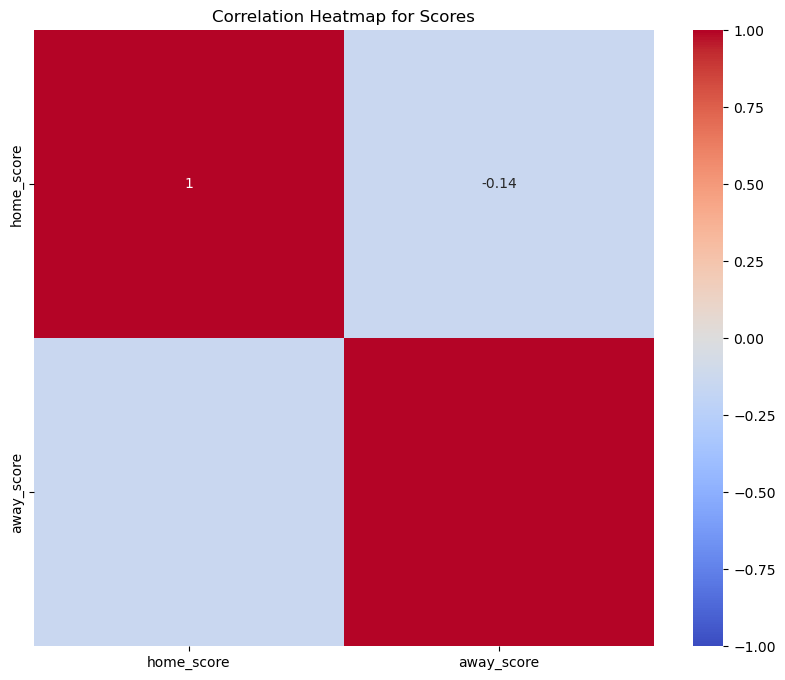

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(results[['home_score', 'away_score']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Scores')
plt.show()

bar plot to see how many times home won and away won or draw:

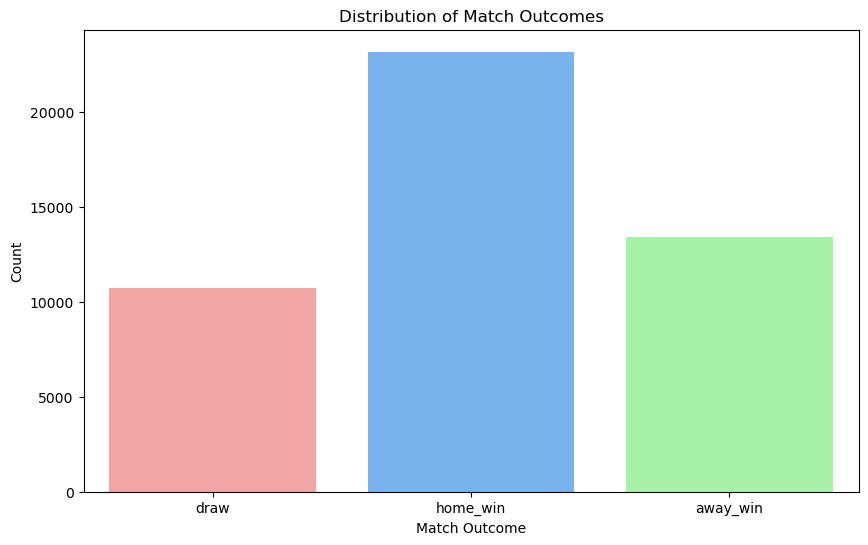

In [8]:
results['outcome'] = results.apply(lambda row: 'draw' if row['home_score'] == row['away_score'] 
                                   else ('home_win' if row['home_score'] > row['away_score'] 
                                   else 'away_win'), axis=1)

my_palette = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(10, 6))
sns.countplot(data=results, x='outcome', palette=my_palette)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome')
plt.ylabel('Count')
plt.show()

In [9]:
results.drop(['outcome', 'year'], axis=1, inplace=True)

table that shows us the first 10 rows of the goalscorers data and showing all the features:

In [10]:
goalscorer=pd.read_csv('goalscorers.csv')
goalscorer.head(10)

date  home_team away_team       team                scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay       José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay      Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay      Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay       José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina         Alberto Ohaco     2.0   
5  1916-07-06  Argentina     Chile      Chile        Telésforo Báez    44.0   
6  1916-07-06  Argentina     Chile  Argentina    Juan Domingo Brown    60.0   
7  1916-07-06  Argentina     Chile  Argentina    Juan Domingo Brown    62.0   
8  1916-07-06  Argentina     Chile  Argentina  Alberto Marcovecchio    67.0   
9  1916-07-06  Argentina     Chile  Argentina         Alberto Ohaco    75.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  
5     False    False  
6     False     True  
7     False     True  
8     False    False  
9     False    False

table that shows us the last 10 rows of the goalscorer data and showing all the features:

In [11]:
goalscorer.tail(10)

date  home_team      away_team           team  \
44119  2024-06-08    Estonia  Faroe Islands  Faroe Islands   
44120  2024-06-08    Estonia  Faroe Islands        Estonia   
44121  2024-06-08    Estonia  Faroe Islands        Estonia   
44122  2024-06-08    Estonia  Faroe Islands        Estonia   
44123  2024-06-08    Estonia  Faroe Islands        Estonia   
44124  2024-06-08     Latvia      Lithuania      Lithuania   
44125  2024-06-08     Latvia      Lithuania      Lithuania   
44126  2024-06-11     Latvia  Faroe Islands         Latvia   
44127  2024-06-11  Lithuania        Estonia        Estonia   
44128  2024-06-11  Lithuania        Estonia      Lithuania   

                      scorer  minute  own_goal  penalty  
44119          Petur Knudsen    24.0     False    False  
44120     Alex Matthias Tamm    43.0     False    False  
44121            Henri Anier    50.0     False    False  
44122              Edgar Tur    83.0     False    False  
44123         Danil Kuraksin    89.0     False    False  
44124         Armandas Kučys    49.0     False    False  
44125         Armandas Kučys    72.0     False    False  
44126       Andrejs Cigaņiks    49.0     False    False  
44127      Mark Anders Lepik    82.0     False    False  
44128  Giedrius Matulevicius    84.0     False    False

exploring missing data in goalscorers table:

In [12]:
missing_values_goalscorer = goalscorer.isnull().sum()
print("Number of missing values in each feature in goalscorer table:")
print(missing_values_goalscorer)

Number of missing values in each feature in goalscorer table:
date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64


To view statistical information on each column in goalscorer data:

Count: There are 43,870 recorded goal events.
Mean: The average minute in which goals are scored is around the 50th minute.
std: The standard deviation is 26.35 minutes.
min: Goals can be scored as early as the 1st minute.
25%, 50%, 75%: 25% of goals are scored by the 28th minute, 50% by the 51st minute, and 75% by the 73rd minute.
max: The latest recorded goal is in the 122nd minute.

In [13]:
goalscorer.describe()

minute
count  43870.000000
mean      50.010372
std       26.346979
min        1.000000
25%       28.000000
50%       51.000000
75%       73.000000
max      122.000000

top 10 teams depending on number of goals:

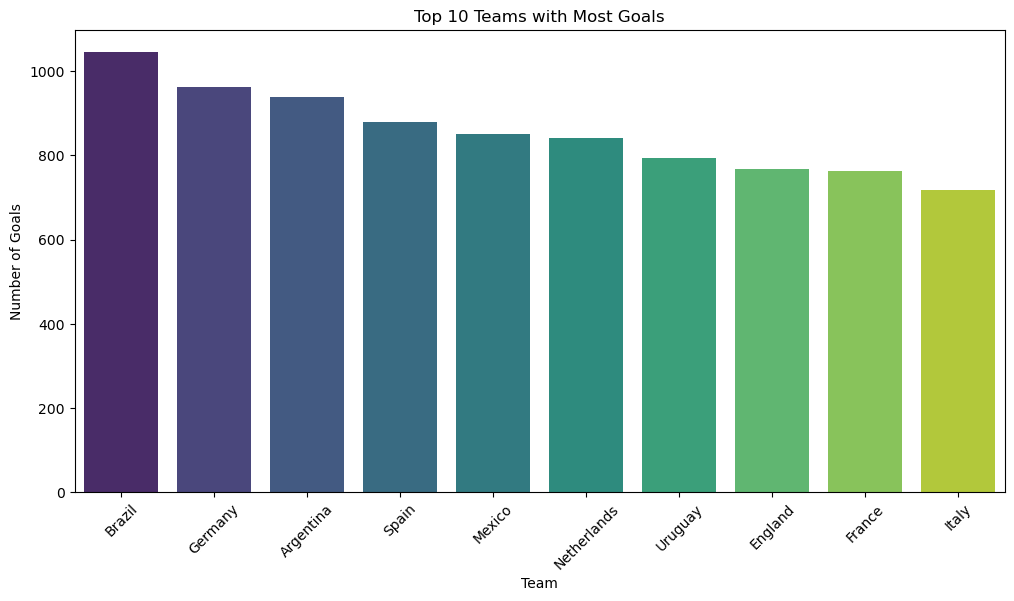

In [14]:
top_teams = goalscorer['team'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='viridis')
plt.title('Top 10 Teams with Most Goals')
plt.xlabel('Team')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()


top 10 playes that got best number of goals

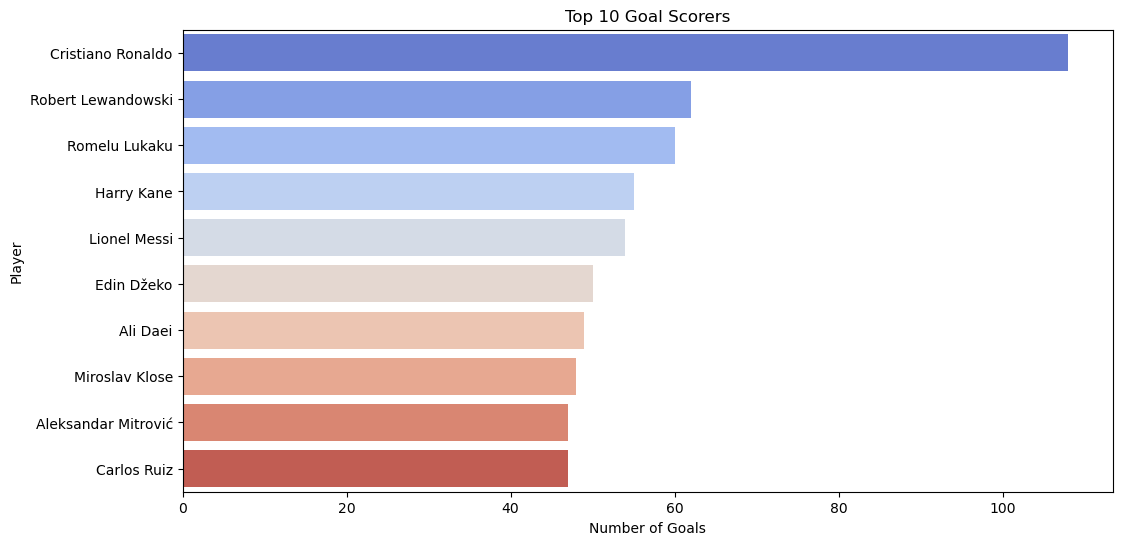

In [15]:
top_scorers = goalscorer['scorer'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='coolwarm')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Number of Goals')
plt.ylabel('Player')
plt.show()

table that shows us the first 10 rows of the shootout data and showing all the features:

In [16]:
shootout=pd.read_csv('shootouts.csv')
shootout.head(10)

date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN
5  1973-04-21      Senegal             Ghana        Ghana           NaN
6  1973-06-14       Guinea              Mali       Guinea           NaN
7  1973-06-14    Mauritius          Tanzania    Mauritius           NaN
8  1973-07-26     Malaysia            Kuwait     Malaysia           NaN
9  1973-07-26     Cambodia         Singapore    Singapore           NaN

table that shows us the last 10 rows of the shootout data and showing all the features:

In [17]:
shootout.tail(10)

date                 home_team                     away_team  \
627  2024-02-03                Cape Verde                  South Africa   
628  2024-02-03                     Qatar                    Uzbekistan   
629  2024-02-07                   Nigeria                  South Africa   
630  2024-03-23                   Tunisia                       Croatia   
631  2024-03-26               New Zealand                       Tunisia   
632  2024-03-26                     Wales                        Poland   
633  2024-03-26                   Georgia                        Greece   
634  2024-03-26  Turks and Caicos Islands                      Anguilla   
635  2024-03-26    British Virgin Islands  United States Virgin Islands   
636  2024-06-11                 Lithuania                       Estonia   

                     winner             first_shooter  
627            South Africa                Cape Verde  
628                   Qatar                Uzbekistan  
629                 Nigeria                   Nigeria  
630                 Croatia                   Croatia  
631                 Tunisia               New Zealand  
632                  Poland                    Poland  
633                 Georgia                   Georgia  
634                Anguilla  Turks and Caicos Islands  
635  British Virgin Islands    British Virgin Islands  
636                 Estonia                 Lithuania

exploring missing data in shootout table:

In [18]:
missing_values_shootout = shootout.isnull().sum()
print("Number of missing values in each feature in shootout table:")
print(missing_values_shootout)

Number of missing values in each feature in shootout table:
date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64


To view statistical information on each column in shootout data:

Count: There are 637 shootouts recorded, with 223 having a recorded first shooter.
Unique: The data spans 562 unique dates, involving 180 unique home teams, 189 unique away teams, and 175 unique winners.
Top: The most frequent date for shootouts is 2024-03-26. South Africa appears most frequently as the home team (18 times), Egypt as the away team (15 times), and South Korea as the winner (15 times). Colombia is the most frequent first shooter team (11 times).
Frequency: The frequency indicates how often the most frequent values occur.

In [19]:
shootout.describe()

date     home_team away_team       winner first_shooter
count          637           637       637          637           223
unique         562           180       189          175            85
top     2024-03-26  South Africa     Egypt  South Korea      Colombia
freq             5            18        15           15            11

the name of the top 10 teams with most shootout wins:

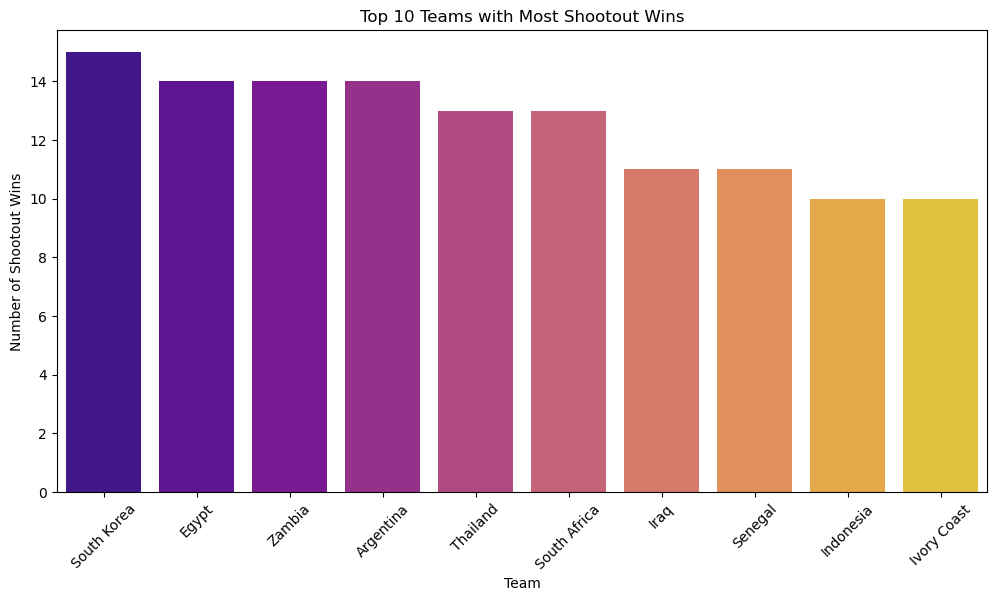

In [20]:
shootout_wins = shootout['winner'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=shootout_wins.index, y=shootout_wins.values, palette='plasma')
plt.title('Top 10 Teams with Most Shootout Wins')
plt.xlabel('Team')
plt.ylabel('Number of Shootout Wins')
plt.xticks(rotation=45)
plt.show()


the percent of matches with penalty shoot out showing it using pie chart :

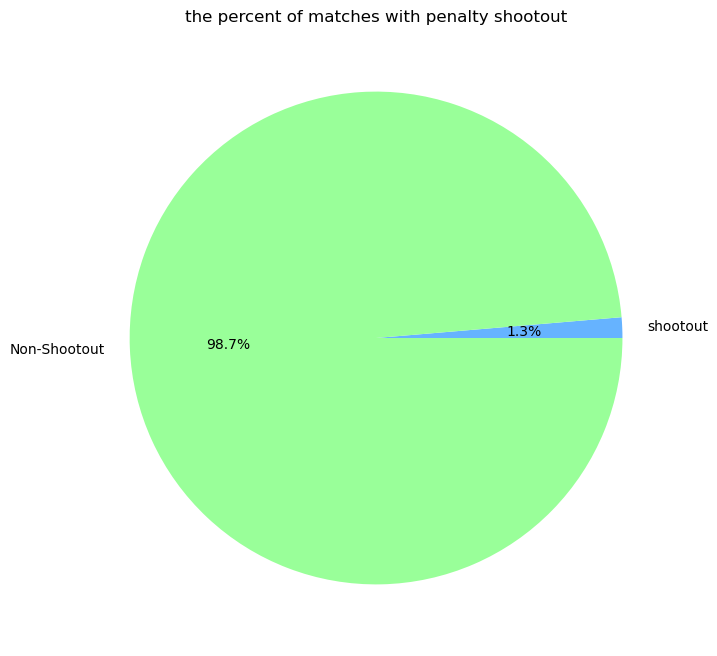

In [21]:
total_matches = len(results)
penalty_shootout = len(shootout)
non_shootout_matches = total_matches - penalty_shootout
plt.figure(figsize=(8, 8))
plt.pie([penalty_shootout, non_shootout_matches], labels=['shootout', 'Non-Shootout'], autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('the percent of matches with penalty shootout')
plt.show()

section B:

result imputation:

Categorical variables like 'home_team' and 'away_team' are converted into a numerical format using LabelEncoder.

KNNImputer is used to fill in missing values in the categorical data because its More accurate than the methods that we learned perviouse in the tutorial as it is based on an approximate subset of the data.The KNN imputer works by finding the k-nearest neighbor and imputing missing values using the mean of these neighbor

For numerical columns like 'home_score' and 'away_score' MICE is applied. This method models each feature with missing values as a function of other features in a round-robin fashion. It can produce better imputations compared to simpler methods like mean imputation and
More accurate than previous methods as it is adaptive and Works with different types of data

After imputation, numerical scores are rounded and converted back to integers. This is necessary because scoring in sports is typically represented as numbers, and the imputation can result to non-integer values.

after we complete all of this the encoded categorical values are transformed back to their original form using the inverse_transform method of LabelEncoder. This step is important for maintaining the interpretability of the data, allowing humans to understand the team names instead of encoded integers.

and in the end we check that there is no missing data in results table.

In [22]:
categorical_cols = ['home_team', 'away_team']
numerical_cols = ['home_score', 'away_score']

# Label Encoding for categorical data
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    results[col] = le.fit_transform(results[col].astype(str))
    label_encoders[col] = le

# KNN Imputation for categorical data
knn_imputer = KNNImputer(n_neighbors=5)
results[categorical_cols] = knn_imputer.fit_transform(results[categorical_cols])

# MICE Imputation for numerical data
mice_imputer = IterativeImputer()
results[numerical_cols] = mice_imputer.fit_transform(results[numerical_cols])

results['home_score'] = results['home_score'].round().astype(int)
results['away_score'] = results['away_score'].round().astype(int)

# Decode labels back to original text form
for col in categorical_cols:
    le = label_encoders[col]
    results[col] = le.inverse_transform(results[col].astype(int))

missing_values_results = results.isnull().sum()
print("Number of missing values after imputation:")
print(missing_values_results)


Number of missing values after imputation:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


features:

Home team won: This is a boolean feature representing whether the home team won the match. In the case of a draw, the winner is determined by the shootouts.csv file.

In [23]:
def determine_home_team_won(row):
    if row['home_score'] > row['away_score']:
        return True
    elif row['home_score'] < row['away_score']:
        return False
    else:
        shootout_winner = shootout[
            (shootout['date'] == row['date']) &
            (shootout['home_team'] == row['home_team']) &
            (shootout['away_team'] == row['away_team'])
        ]['winner'].values
        if len(shootout_winner) > 0:
            return shootout_winner[0] == row['home_team']
        else:
            return False 

results['home_team_won'] = results.apply(determine_home_team_won, axis=1)

Home team win rate: This feature calculates the percentage of matches the home team has won up to that point in time.
Away team win rate: This feature calculates the percentage of matches the away team has won up to that point in time.

In [24]:
home_wins = 0
home_matches = 0
away_wins = 0
away_matches = 0
home_win_percentages = []
away_win_percentages = []

for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    
    if home_score > away_score:
        home_wins += 1
    home_matches += 1
    
    home_win_percentage = (home_wins / home_matches) * 100
    home_win_percentages.append(home_win_percentage)
    
    if away_score > home_score:
        away_wins += 1
    away_matches += 1
    
    away_win_percentage = (away_wins / away_matches) * 100
    away_win_percentages.append(away_win_percentage)

results['home_team_win_rate'] = home_win_percentages
results['away_team_win_rate'] = away_win_percentages

Home team average goals: This feature calculates the average number of goals the home team has scored up to that point in time.

In [25]:
home_goals = 0
home_matches = 0
home_avg_goals = []

for index, row in results.iterrows():
    home_team = row['home_team']
    home_score = row['home_score']
    
    home_matches += 1
    
    home_goals += home_score
    
    if home_matches > 0:
        avg_goals = home_goals / home_matches
    else:
        avg_goals = 0.0
    
    home_avg_goals.append(avg_goals)

results['home_team_avg_goals'] = home_avg_goals

Away team average goals: This feature calculates the average number of goals the away team has scored up to that point in time.

In [26]:
away_goals = 0
away_matches = 0
away_avg_goals = []

for index, row in results.iterrows():
    away_team = row['away_team']
    away_score = row['away_score']
    
    away_matches += 1
    
    away_goals += away_score
    
    if away_matches > 0:
        avg_goals = away_goals / away_matches
    else:
        avg_goals = 0.0
    
    away_avg_goals.append(avg_goals)

results['away_team_avg_goals'] = away_avg_goals

more features:

The feature outcome is a categorical representation of the match result, which can take one of three values: draw, home_win, or away_win.
having a straightforward categorical feature can simplify the model's structure and This feature directly shows the result of a game in a way that is immediately useful for any analysis related to outcomes without requiring further computation each time it is needed

In [27]:
results['outcome'] = results.apply(lambda row: 'draw' if row['home_score'] == row['away_score'] 
                                   else ('home_win' if row['home_score'] > row['away_score'] 
                                   else 'away_win'), axis=1)

this feature calculates historical performance metrics for each team in terms of wins and win rates both for home and away games.
Understanding a team's past performance can provide significant insights into their likely future performance under similar conditions and can help predict if a home team will win in the future.

In [28]:
home_wins = {}
away_wins = {}
home_matches = {}
away_matches = {}

for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    
    if home_team not in home_wins:
        home_wins[home_team] = 0
        home_matches[home_team] = 0
    
    if away_team not in away_wins:
        away_wins[away_team] = 0
        away_matches[away_team] = 0
    
    home_matches[home_team] += 1
    away_matches[away_team] += 1
    
    if home_score > away_score:
        home_wins[home_team] += 1
        results.at[index, 'home_team_won'] = True
    elif away_score > home_score:
        away_wins[away_team] += 1
        results.at[index, 'home_team_won'] = False
    else:
        results.at[index, 'home_team_won'] = False
    
    home_win_rate = (home_wins[home_team] / home_matches[home_team]) * 100 if home_matches[home_team] > 0 else 0.0
    away_win_rate = (away_wins[away_team] / away_matches[away_team]) * 100 if away_matches[away_team] > 0 else 0.0
    
    results.at[index, 'home_team_win_rate2'] = home_win_rate
    results.at[index, 'away_team_win_rate2'] = away_win_rate


this feature computes the average number of goals scored by each team in their home and away games respectively.
This can be important in predicting outcomes, especially in this sport because goal-scoring capability significantly influences match results and can help us predict who won.

In [29]:
home_goals = {}
away_goals = {}
home_matches = {}
away_matches = {}

for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    
    if home_team not in home_goals:
        home_goals[home_team] = 0
        home_matches[home_team] = 0
    
    if away_team not in away_goals:
        away_goals[away_team] = 0
        away_matches[away_team] = 0
    
    home_matches[home_team] += 1
    away_matches[away_team] += 1
    
    home_goals[home_team] += home_score
    away_goals[away_team] += away_score
    
    if home_matches[home_team] > 0:
        home_avg_goals = home_goals[home_team] / home_matches[home_team]
    else:
        home_avg_goals = 0.0
    
    if away_matches[away_team] > 0:
        away_avg_goals = away_goals[away_team] / away_matches[away_team]
    else:
        away_avg_goals = 0.0
    
    results.at[index, 'home_team_avg_goals2'] = home_avg_goals
    results.at[index, 'away_team_avg_goals2'] = away_avg_goals


total goals feature provides insight into the overall goal of the game. High-scoring games might indicate weaker defenses  which could be important in predicting future game score.
The goal difference feature is a straightforward measure of dominance in a match. A positive goal difference means the home team won by that margin, while a negative difference indicates an away win.
These features directly correlate with the outcome of a match, making them powerful predictors in models focused on match results. Including them can significantly improve the model's accuracy

In [30]:
results['total_goals'] = results['home_score'] + results['away_score']
results['goal_difference'] = results['home_score'] - results['away_score']

this feature called tournament_importance, which assigns a numerical importance to the tournament field based on its perceived significance.
this feature provides contextual information that helps the model understand under what circumstances the match was played. 

In [31]:
results['tournament_importance'] = results['tournament'].apply(lambda x: 1 if x == 'FIFA World Cup' else 0.5 if x == 'Friendly' else 0.2)

This feature provides a short-term performance metric reflecting the recent success rate of the home teams.The recency of the data makes it highly relevant. Models equipped with this feature are likely to predict more accurately by weighting recent outcomes more heavily than distant ones.

In [32]:
results['recent_win_rate_home'] = results.groupby('home_team')['home_team_won'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

This feature provides a short-term performance metric reflecting the recent success rate of the away teams.
By focusing on away games, this might provide a look on how well teams cope with the adversities of playing outside their usual environment so it can help us predict if it will win.

In [33]:
results['recent_win_rate_away'] = results.groupby('away_team')['home_team_won'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

imputation:

In [34]:
missing_values_results = results.isnull().sum()
print("Number of missing values after imputation:")
print(missing_values_results)

Number of missing values after imputation:
date                     0
home_team                0
away_team                0
home_score               0
away_score               0
tournament               0
city                     0
country                  0
neutral                  0
home_team_won            0
home_team_win_rate       0
away_team_win_rate       0
home_team_avg_goals      0
away_team_avg_goals      0
outcome                  0
home_team_win_rate2      0
away_team_win_rate2      0
home_team_avg_goals2     0
away_team_avg_goals2     0
total_goals              0
goal_difference          0
tournament_importance    0
recent_win_rate_home     0
recent_win_rate_away     0
dtype: int64


Choosing between different imputation methods like KNN or MICE for the goalscorer dataset, as compared to the results dataset, depends on several factors such as the nature of the data, the patterns within the data, computational cost, and the specific goals of the analysis.

The 'scorer' column is categorical. Imputation using the mode is straightforward, easy and quick. Using more complex methods like KNN or MICE might not significantly improve the imputation quality here because the 'best scorer' or the most frequent scorer does not necessarily depend on other variables.
The 'minute' column is numeric. The median provides a robust central tendency measure that doesn’t assume a normal distribution. KNN or MICE could provide more nuanced imputation based on the correlations with other features but at the cost of added complexity and computation.
Converting 'minute' Column to Integer Type To ensure that the 'minute' column has the appropriate data type for modeling.

In [35]:
most_frequent_scorer = goalscorer['scorer'].mode()[0]
goalscorer['scorer'].fillna(most_frequent_scorer, inplace=True)

median_minute = goalscorer['minute'].median()
goalscorer['minute'].fillna(median_minute, inplace=True)

missing_values_after_imputation = goalscorer.isnull().sum()
print("Number of missing values after imputation:")
print(missing_values_after_imputation)

goalscorer['minute'] = goalscorer['minute'].astype(int)

Number of missing values after imputation:
date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64


exclusion:

By excluding the first_shooter column, i want to aim to streamline your dataset, focus on more relevant predictors or enhance the model's performance by reducing noise and complexity and because there is 414 missing value out of 636

In [36]:
shootout.drop(columns=['first_shooter'], inplace=True)

In [37]:
shootout.head(10)

date    home_team         away_team       winner
0  1967-08-22        India            Taiwan       Taiwan
1  1971-11-14  South Korea  Vietnam Republic  South Korea
2  1972-05-07  South Korea              Iraq         Iraq
3  1972-05-17     Thailand       South Korea  South Korea
4  1972-05-19     Thailand          Cambodia     Thailand
5  1973-04-21      Senegal             Ghana        Ghana
6  1973-06-14       Guinea              Mali       Guinea
7  1973-06-14    Mauritius          Tanzania    Mauritius
8  1973-07-26     Malaysia            Kuwait     Malaysia
9  1973-07-26     Cambodia         Singapore    Singapore

transformation:

Applying StandardScaler to the minute column in the goalscorer dataset and creating a new column, minute_standardized, involves scaling this feature to have zero mean and unit varianc.that way i ensure that the timing of goals is appropriately weighted relative to other numerical features in the dataset,and could leading to more accurate predictions.

In [38]:
scaler = StandardScaler()
goalscorer['minute_standardized'] = scaler.fit_transform(goalscorer[['minute']])

In [39]:
goalscorer.head(10)

date  home_team away_team       team                scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay       José Piendibene      44   
1  1916-07-02      Chile   Uruguay    Uruguay      Isabelino Gradín      55   
2  1916-07-02      Chile   Uruguay    Uruguay      Isabelino Gradín      70   
3  1916-07-02      Chile   Uruguay    Uruguay       José Piendibene      75   
4  1916-07-06  Argentina     Chile  Argentina         Alberto Ohaco       2   
5  1916-07-06  Argentina     Chile      Chile        Telésforo Báez      44   
6  1916-07-06  Argentina     Chile  Argentina    Juan Domingo Brown      60   
7  1916-07-06  Argentina     Chile  Argentina    Juan Domingo Brown      62   
8  1916-07-06  Argentina     Chile  Argentina  Alberto Marcovecchio      67   
9  1916-07-06  Argentina     Chile  Argentina         Alberto Ohaco      75   

   own_goal  penalty  minute_standardized  
0     False    False            -0.229019  
1     False    False             0.189720  
2     False    False             0.760727  
3     False    False             0.951063  
4     False    False            -1.827840  
5     False    False            -0.229019  
6     False     True             0.380056  
7     False     True             0.456190  
8     False    False             0.646526  
9     False    False             0.951063

In [40]:
results.head(10)

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5 1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6 1877-03-03   England  Scotland           1           3   Friendly   London   
7 1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8 1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9 1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   

    country  neutral  home_team_won  ...   outcome  home_team_win_rate2  \
0  Scotland    False          False  ...      draw             0.000000   
1   England    False           True  ...  home_win           100.000000   
2  Scotland    False           True  ...  home_win            50.000000   
3   England    False          False  ...      draw            50.000000   
4  Scotland    False           True  ...  home_win            66.666667   
5  Scotland    False           True  ...  home_win            75.000000   
6   England    False          False  ...  away_win            33.333333   
7     Wales    False          False  ...  away_win             0.000000   
8  Scotland    False           True  ...  home_win            80.000000   
9  Scotland    False           True  ...  home_win            83.333333   

   away_team_win_rate2  home_team_avg_goals2 away_team_avg_goals2  \
0             0.000000              0.000000             0.000000   
1             0.000000              4.000000             2.000000   
2             0.000000              1.000000             0.500000   
3             0.000000              3.000000             2.000000   
4             0.000000              1.666667             0.333333   
5             0.000000              2.250000             0.000000   
6            33.333333              2.333333             2.333333   
7            50.000000              0.000000             2.250000   
8             0.000000              3.200000             0.750000   
9             0.000000              4.166667             0.000000   

   total_goals  goal_difference  tournament_importance  recent_win_rate_home  \
0            0                0                    0.5              0.000000   
1            6                2                    0.5              1.000000   
2            3                1                    0.5              0.500000   
3            4                0                    0.5              0.500000   
4            3                3                    0.5              0.666667   
5            4                4                    0.5              0.750000   
6            4               -2                    0.5              0.333333   
7            2               -2                    0.5              0.000000   
8            9                5                    0.5              0.800000   
9            9                9                    0.5              1.000000   

   recent_win_rate_away  
0              0.000000  
1              1.000000  
2              0.500000  
3              0.500000  
4              0.666667  
5              1.000000  
6              0.333333  
7              0.250000  
8              0.750000  
9              1.000000  

[10 rows x 24 columns]

section c:

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Execution time for Random Forest: 3104.86 seconds
Accuracy: 0.8289


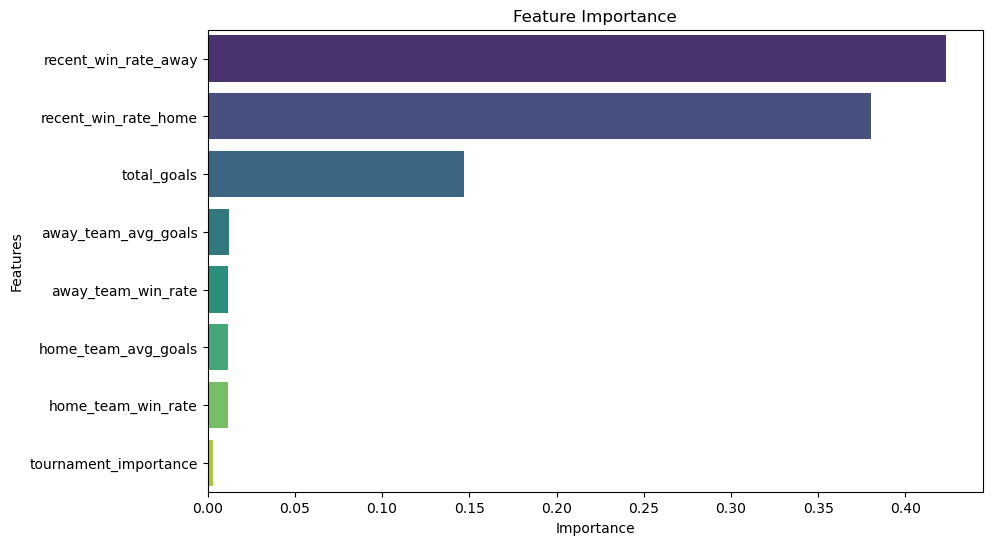

In [41]:
RSEED = 10
# Feature selection
X = results[['home_team_win_rate','away_team_win_rate',
             'home_team_avg_goals',
             'away_team_avg_goals', 
             'total_goals','tournament_importance','recent_win_rate_home','recent_win_rate_away']]

y = results['home_team_won'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

start_time = time.time()
rf = RandomForestClassifier(random_state=RSEED)

parameters_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]    
}

grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time for Random Forest: {elapsed_time:.2f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Best Parameters: {'n_estimators': 50}
Execution time for AdaBoost: 24.57 seconds
Accuracy: 0.8362


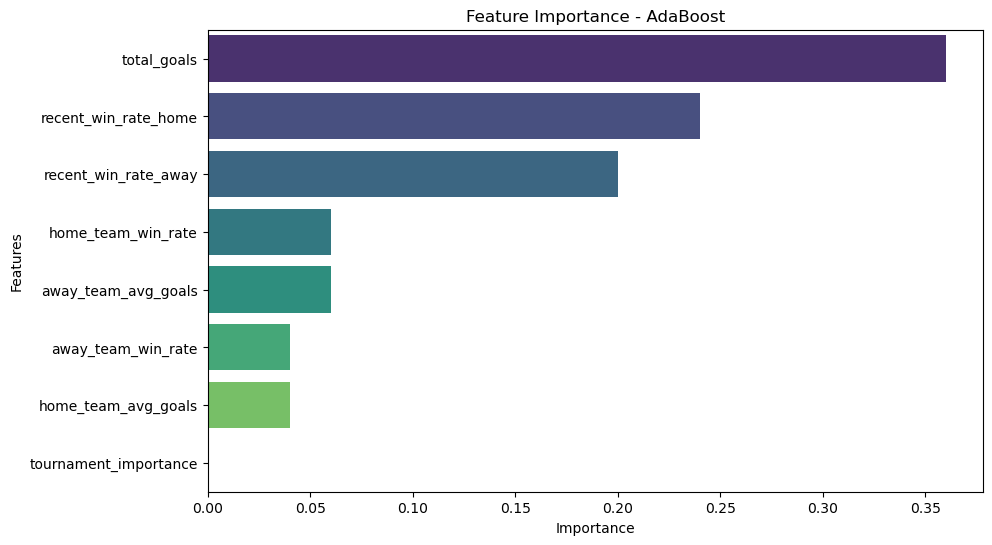

In [42]:
start_time = time.time()
ab = AdaBoostClassifier(random_state=RSEED)

parameters_grid = {
    'n_estimators': [20, 50, 100]
}

grid_search = GridSearchCV(estimator=ab, param_grid=parameters_grid, cv=5)
grid_search.fit(X_train, y_train)

best_ab = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_ab.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time for AdaBoost: {elapsed_time:.2f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

feature_importances = pd.DataFrame(best_ab.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='viridis')
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Best Parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Execution time for Gradient Boosting: 309.28 seconds
Accuracy: 0.8377


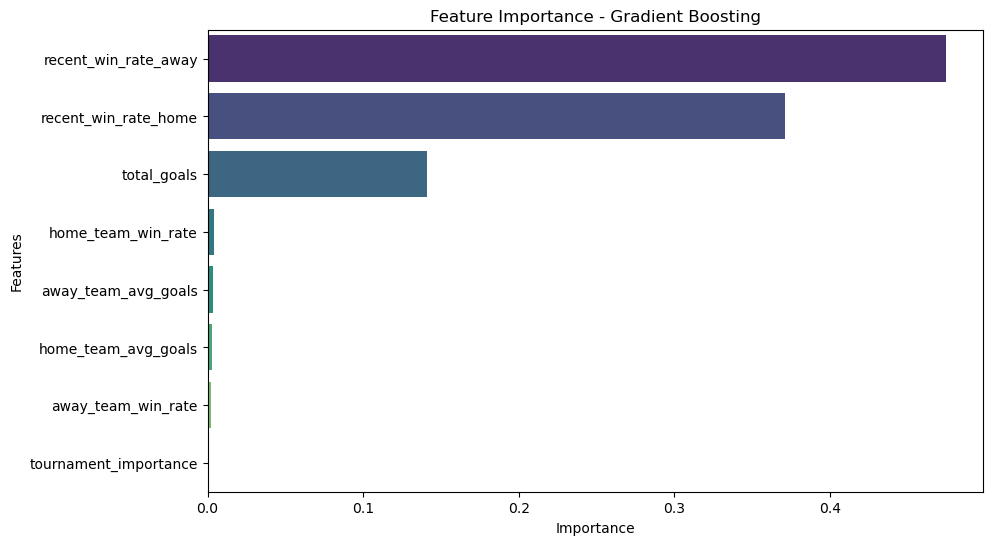

In [43]:
start_time = time.time()
gb = GradientBoostingClassifier(random_state=RSEED)

parameters_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=5)
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_gb.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time for Gradient Boosting: {elapsed_time:.2f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

feature_importances = pd.DataFrame(best_gb.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='viridis')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Best Parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Execution time for K-Nearest Neighbors: 12.19 seconds
Accuracy: 0.8197


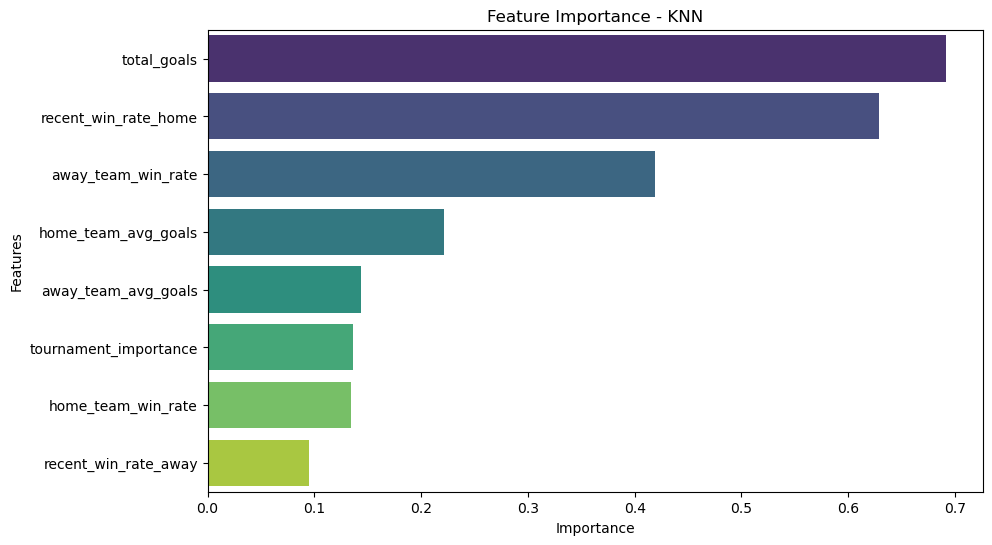

In [44]:
start_time = time.time()
knn = KNeighborsClassifier()

parameters_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_knn.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time for K-Nearest Neighbors: {elapsed_time:.2f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.random.rand(len(X_train.columns)) 
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance - KNN')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Random Forest Classifier:

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Execution time for Random Forest: 3104.86 seconds
Accuracy: 0.8289

AdaBoost Classifier:

Best Parameters: {'n_estimators': 50}
Execution time for AdaBoost: 24.57 seconds
Accuracy: 0.8362

Gradient Boosting Classifier:

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Execution time for Gradient Boosting: 309.28 seconds
Accuracy: 0.8377

K-Nearest Neighbors (KNN):

Best Parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Execution time for K-Nearest Neighbors: 12.19 seconds
Accuracy: 0.8197

Discussion:

Accuracy: Gradient Boosting achieved the highest accuracy, followed closely by Random Forest and AdaBoost.The higher accuracy of Gradient Boosting and AdaBoost can be attributed to their ability to build strong learners from multiple weak learners, effectively capturing complex patterns in the data.

Execution Time: KNN was the fastest, while Random Forest took the longest. KNN's quick execution is due to its simplicity and lack of training phase, as it classifies based on the nearest neighbors at runtime. Random Forest's longer execution time is a result of training multiple decision trees and aggregating their results, which becomes computationally intensive with higher complexity and larger datasets.

Feature Importance: Home team win rate, recent win rate (home), and tournament importance were consistently important features across models. These features are critical because they directly influence the likelihood of the home team winning. Historical performance (win rate), recent performance (recent win rate), and the significance of the match (tournament importance) provide valuable context for predictions.

in the end :
Gradient Boosting offers the best performance but at a higher computational cost. It is excellent at capturing intricate patterns in the data, making it a top choice for achieving high accuracy.

AdaBoost provides good accuracy with a shorter training time compared to Gradient Boosting. It is effective in improving the performance of weak classifiers.

Random Forest delivers competitive accuracy but requires significantly more time due to the ensemble of decision trees. It is robust and can handle large datasets with higher dimensionality.

KNN is the fastest but slightly less accurate. It is simple and effective for smaller datasets but may struggle with larger, more complex data.

section D:

In [77]:
home_team_stats = results.groupby('home_team').agg({
    'home_score': ['sum', 'count'],
    'away_score': 'sum', 
    'home_team_win_rate2': 'last', 
    'home_team_avg_goals2': 'last'   
})

home_team_stats.columns = ['home_goals', 'home_matches', 'home_goals_conceded', 'home_win_rate', 'home_avg_goals']

away_team_stats = results.groupby('away_team').agg({
    'away_score': ['sum', 'count'],
    'home_score': 'sum', 
    'away_team_win_rate2': 'last',
    'away_team_avg_goals2': 'last'   
})

away_team_stats.columns = ['away_goals', 'away_matches', 'away_goals_conceded', 'away_win_rate', 'away_avg_goals']

team_stats = pd.concat([home_team_stats, away_team_stats], axis=1)

team_stats['total_matches'] = team_stats['home_matches'] + team_stats['away_matches']
team_stats['total_goals'] = team_stats['home_goals'] + team_stats['away_goals']
team_stats['total_goals_conceded'] = team_stats['home_goals_conceded'] + team_stats['away_goals_conceded']
team_stats['total_avg_goals'] = team_stats['total_goals'] / team_stats['total_matches']
team_stats['total_win_rate'] = ((home_team_stats['home_win_rate'] * home_team_stats['home_matches'] +
                                away_team_stats['away_win_rate'] * away_team_stats['away_matches']) /
                               team_stats['total_matches'])
team_stats['goal_difference'] = team_stats['total_goals'] - team_stats['total_goals_conceded']
team_stats['goal_conversion_rate'] = team_stats['total_goals'] / team_stats['total_matches']  

team_stats.fillna(0, inplace=True)

team_stats.head(10)


home_goals  home_matches  home_goals_conceded  home_win_rate  \
Abkhazia              39.0          22.0                 13.0      50.000000   
Afghanistan           55.0          46.0                 69.0      39.130435   
Albania              232.0         200.0                222.0      38.000000   
Alderney              20.0          48.0                199.0       2.083333   
Algeria              627.0         334.0                283.0      57.185629   
American Samoa        18.0          24.0                145.0      12.500000   
Andalusia             23.0          12.0                 13.0      58.333333   
Andorra               39.0         106.0                218.0       9.433962   
Angola               278.0         193.0                162.0      48.186528   
Anguilla              15.0          28.0                 77.0       7.142857   

                home_avg_goals  away_goals  away_matches  away_goals_conceded  \
Abkhazia              1.772727        12.0          10.0                 13.0   
Afghanistan           1.195652        83.0          91.0                209.0   
Albania               1.160000       129.0         178.0                349.0   
Alderney              0.416667        53.0          87.0                421.0   
Algeria               1.877246       254.0         252.0                313.0   
American Samoa        0.750000        13.0          28.0                199.0   
Andalusia             1.916667         2.0           1.0                  1.0   
Andorra               0.367925        29.0         102.0                294.0   
Angola                1.440415       169.0         203.0                249.0   
Anguilla              0.535714        27.0          51.0                243.0   

                away_win_rate  away_avg_goals  total_matches  total_goals  \
Abkhazia            30.000000        1.200000           32.0         51.0   
Afghanistan         18.681319        0.912088          137.0        138.0   
Albania             15.168539        0.724719          378.0        361.0   
Alderney             4.597701        0.609195          135.0         73.0   
Algeria             29.365079        1.007937          586.0        881.0   
American Samoa       3.571429        0.464286           52.0         31.0   
Andalusia          100.000000        2.000000           13.0         25.0   
Andorra              1.960784        0.284314          208.0         68.0   
Angola              20.197044        0.832512          396.0        447.0   
Anguilla             3.921569        0.529412           79.0         42.0   

                total_goals_conceded  total_avg_goals  total_win_rate  \
Abkhazia                        26.0         1.593750       43.750000   
Afghanistan                    278.0         1.007299       25.547445   
Albania                        571.0         0.955026       27.248677   
Alderney                       620.0         0.540741        3.703704   
Algeria                        596.0         1.503413       45.221843   
American Samoa                 344.0         0.596154        7.692308   
Andalusia                       14.0         1.923077       61.538462   
Andorra                        512.0         0.326923        5.769231   
Angola                         411.0         1.128788       33.838384   
Anguilla                       320.0         0.531646        5.063291   

                goal_difference  goal_conversion_rate  
Abkhazia                   25.0              1.593750  
Afghanistan              -140.0              1.007299  
Albania                  -210.0              0.955026  
Alderney                 -547.0              0.540741  
Algeria                   285.0              1.503413  
American Samoa           -313.0              0.596154  
Andalusia                  11.0              1.923077  
Andorra                  -444.0              0.326923  
Angola                     36.0              1.128788  
Anguilla                 -278.0

In [78]:
X = team_stats[['total_win_rate', 'total_avg_goals', 'goal_difference', 'total_matches','total_goals']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [79]:
def plot_silhouette(X, clusters, title):
    silhouette_vals = silhouette_samples(X, clusters)
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(clusters)):
        cluster_silhouette_vals = silhouette_vals[clusters == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
    plt.yticks(y_ticks, np.unique(clusters) + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.title(title)
    plt.show()

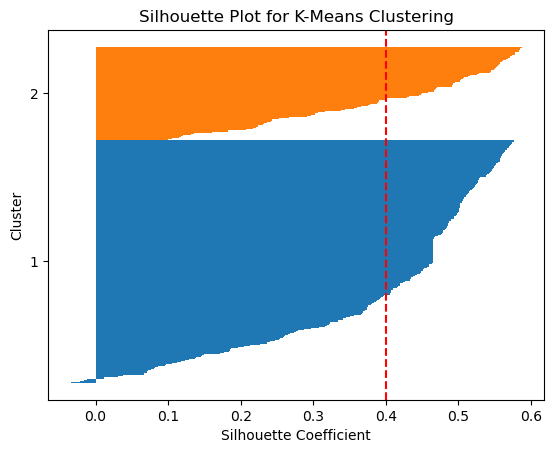

In [80]:
best_kmeans_model = None
best_kmeans_score = -1
best_kmeans_clusters = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans_clusters)
    if silhouette_avg > best_kmeans_score:
        best_kmeans_score = silhouette_avg
        best_kmeans_model = kmeans
        best_kmeans_clusters = kmeans_clusters

team_stats['kmeans_cluster'] = best_kmeans_clusters

plot_silhouette(X_scaled, best_kmeans_clusters, "Silhouette Plot for K-Means Clustering")


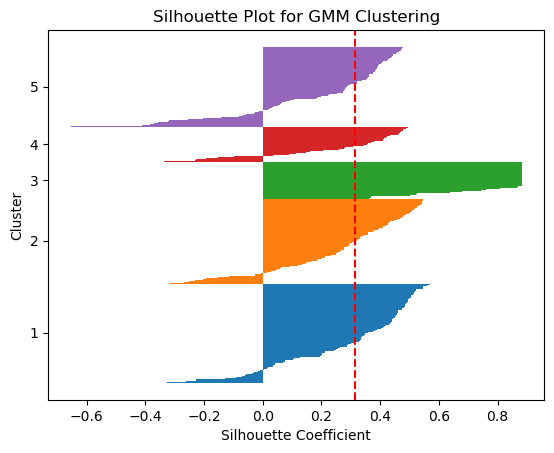

In [81]:
gmm_params = range(2, 10)
best_gmm_model = None
best_gmm_score = -1

for k in gmm_params:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm_clusters = gmm.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, gmm_clusters)
    
    if silhouette_avg > best_gmm_score:
        best_gmm_score = silhouette_avg
        best_gmm_model = gmm
        best_gmm_clusters = gmm_clusters

team_stats['gmm_cluster'] = best_gmm_clusters

plot_silhouette(X_scaled, best_gmm_clusters, "Silhouette Plot for GMM Clustering")

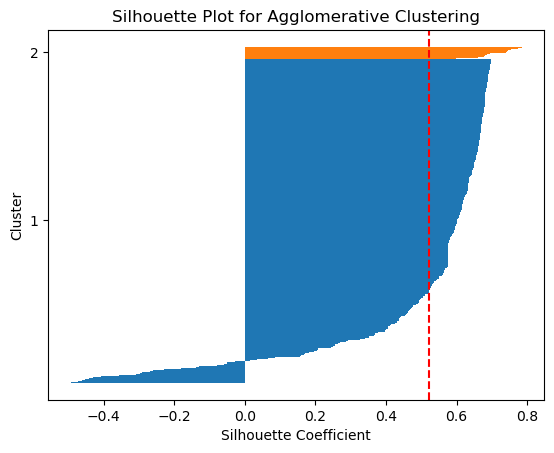

In [82]:
agg_params = {'n_clusters': range(2, 10), 'linkage': ['ward', 'complete', 'average', 'single']}
best_agg_model = None
best_agg_score = -1

for linkage in agg_params['linkage']:
    for k in agg_params['n_clusters']:
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        agg_clusters = agg.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, agg_clusters)
        
        if silhouette_avg > best_agg_score:
            best_agg_score = silhouette_avg
            best_agg_model = agg
            best_agg_clusters = agg_clusters

team_stats['agg_cluster'] = best_agg_clusters

plot_silhouette(X_scaled, best_agg_clusters, "Silhouette Plot for Agglomerative Clustering")

In [83]:
silhouette_avg_kmeans = silhouette_score(X_scaled, best_kmeans_clusters)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg_kmeans}")

silhouette_avg_gmm = silhouette_score(X_scaled, best_gmm_clusters)
print(f"Silhouette Score for GMM Clustering: {silhouette_avg_gmm}")

silhouette_avg_agg = silhouette_score(X_scaled, best_agg_clusters)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg_agg}")


Silhouette Score for K-Means Clustering: 0.4005563580731094
Silhouette Score for GMM Clustering: 0.313658692732124
Silhouette Score for Agglomerative Clustering: 0.5213043482263122


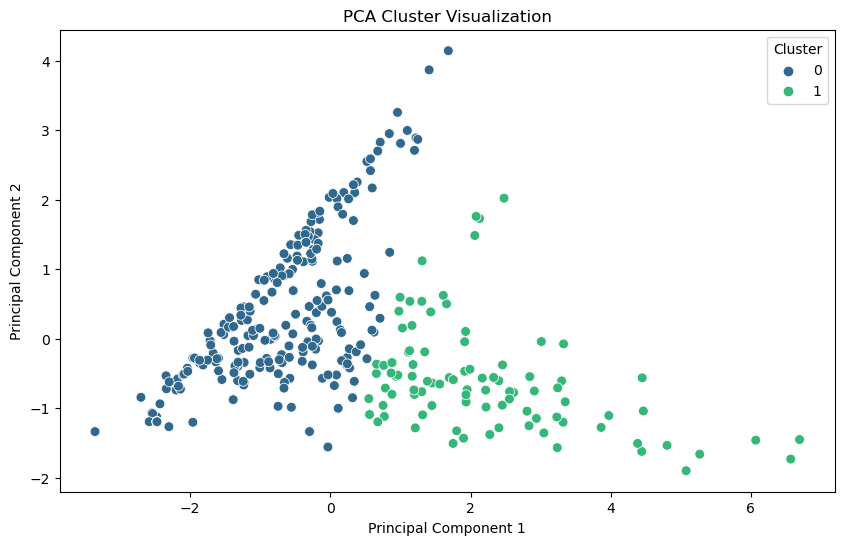

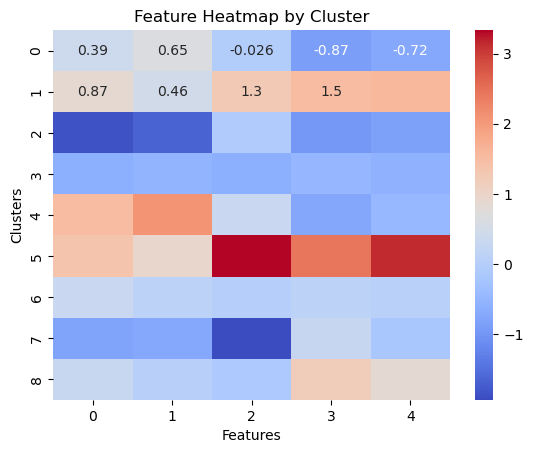

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=team_stats['kmeans_cluster'], palette='viridis', s=50)
plt.title('PCA Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Heatmap of features for each cluster
cluster_centers = kmeans.cluster_centers_
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

In [85]:
print("The most important features contributing to the differences between clusters are:")
for feature in X.columns:
    print(f"- {feature}")

The most important features contributing to the differences between clusters are:
- total_win_rate
- total_avg_goals
- goal_difference
- total_matches
- total_goals


Silhouette Plot for K-Means Clustering
Silhouette Score: 0.4006
plot result: The silhouette plot for K-Means clustering shows two clusters. Most samples have a positive silhouette coefficient, indicating that they are well-clustered. However, there is some variation within the clusters, as seen by the spread of the silhouette values.

Silhouette Plot for GMM Clustering
Silhouette Score: 0.3137
plot result: The silhouette plot for Gaussian Mixture Model (GMM) clustering shows multiple clusters, with some negative silhouette coefficients. This indicates that some samples might be assigned to incorrect clusters.

Silhouette Plot for Agglomerative Clustering
Silhouette Score: 0.5213
plot result: The silhouette plot for Agglomerative clustering shows two distinct clusters. The high silhouette score indicates that this algorithm has formed well-defined and cohesive clusters. 

PCA Cluster Visualization
plot result: The PCA plot shows the distribution of the clusters in a two-dimensional space. It helps visualize how the clusters are separated based on the principal components. There is a clear separation between the clusters, indicating that the features used for clustering are effective.

Feature Heatmap by Cluster
Interpretation: The heatmap displays the mean values of the features for each cluster. This visualization helps to identify which features are the most important in distinguishing between the clusters. The differences in feature values between clusters are apparent, indicating that features like total_win_rate, total_avg_goals, goal_difference, total_matches, and total_goals contribute significantly to the clustering.

Discussion
Best Clustering Algorithm: Agglomerative clustering performed the best, with the highest silhouette score of 0.5213. This suggests that the clusters formed by Agglomerative clustering are the most well-defined and cohesive.
Feature Importance: The features that contributed most to the differences between clusters were total_win_rate, total_avg_goals, goal_difference, total_matches, and total_goals. These features are crucial in distinguishing the performance and characteristics of different teams.

The overall silhouette in GMM clustering score is lower than K-Means, suggesting that GMM clustering is not as effective for this dataset.

In Agglomerative Clustering the samples are closer to their respective clusters, making this the best-performing algorithm in terms of the silhouette score.

section E:

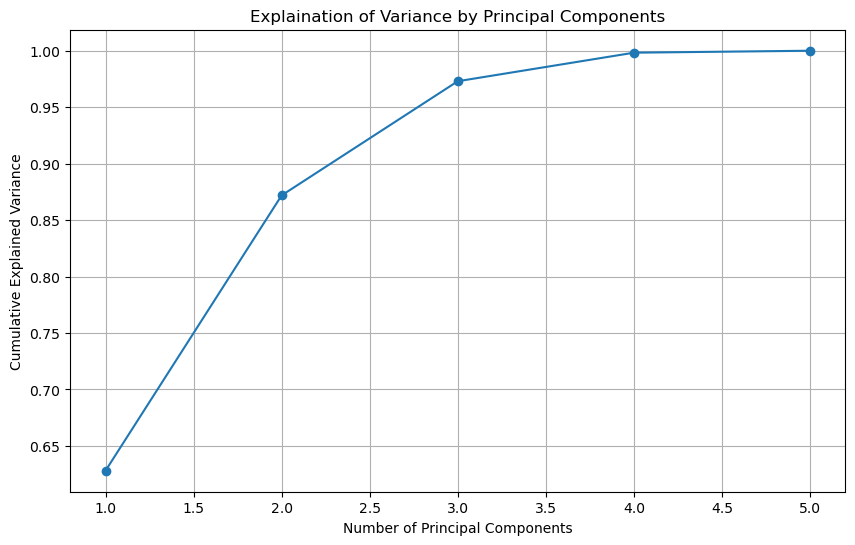

Explained Variance Ratios: [0.627968   0.24389034 0.10112442 0.02526768 0.00174956]
Loadings for each feature on the principal components:
                      PC1       PC2       PC3       PC4       PC5
total_win_rate   0.828189  0.476587  0.142408  0.263801  0.008001
total_avg_goals  0.666397  0.698191  0.136255 -0.229744 -0.007981
goal_difference  0.783801 -0.030914 -0.622344 -0.001034 -0.018823
total_matches    0.790565 -0.545985  0.276093 -0.008742 -0.059749
total_goals      0.883084 -0.457611  0.068831 -0.065287  0.068715


In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explaination of Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, len(loadings) + 1)], index=X.columns)
print("Loadings for each feature on the principal components:")
print(loadings_df)


In [87]:
kmeans_pca = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_pca_clusters = kmeans_pca.fit_predict(X_pca_reduced)

gmm_pca = GaussianMixture(n_components=2, random_state=0)
gmm_pca_clusters = gmm_pca.fit_predict(X_pca_reduced)

agg_pca = AgglomerativeClustering(n_clusters=2)
agg_pca_clusters = agg_pca.fit_predict(X_pca_reduced)

team_stats['kmeans_pca_cluster'] = kmeans_pca_clusters
team_stats['gmm_pca_cluster'] = gmm_pca_clusters
team_stats['agg_pca_cluster'] = agg_pca_clusters


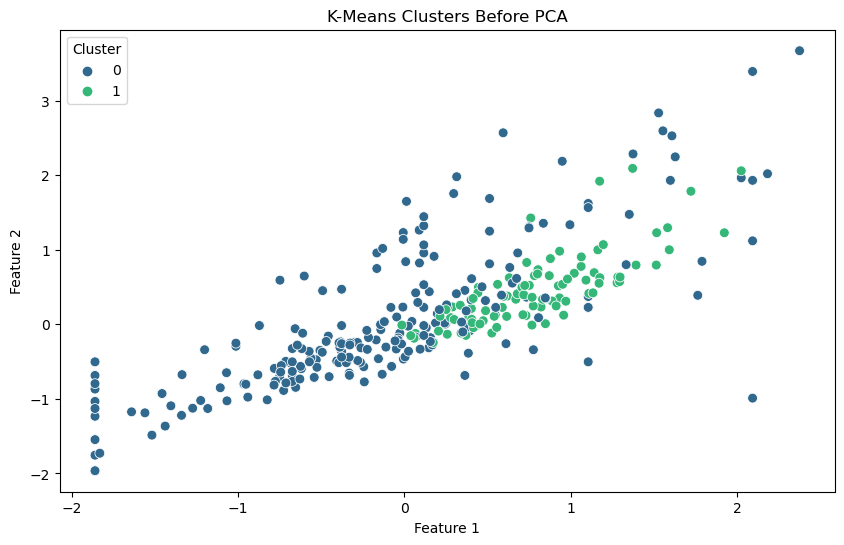

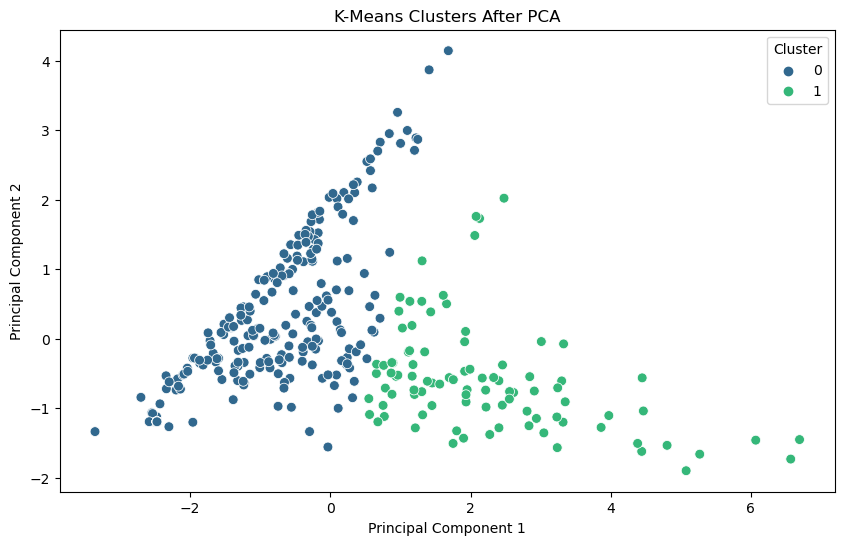

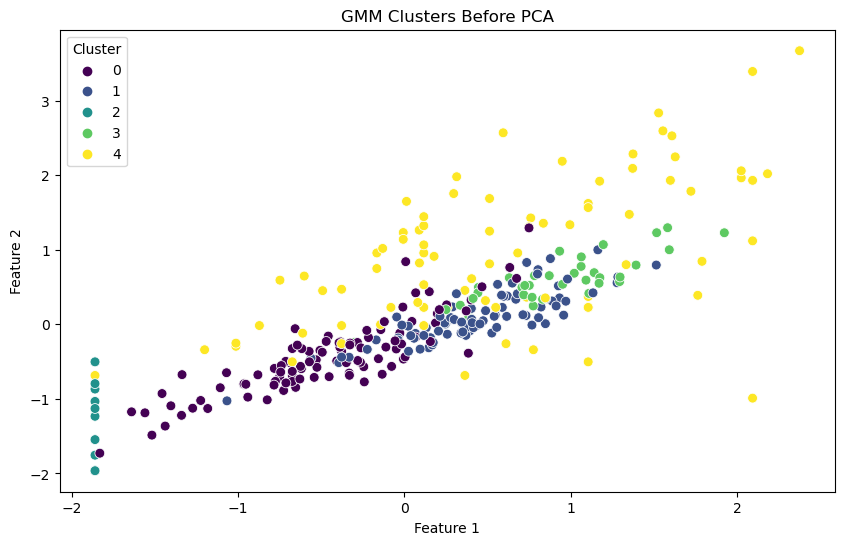

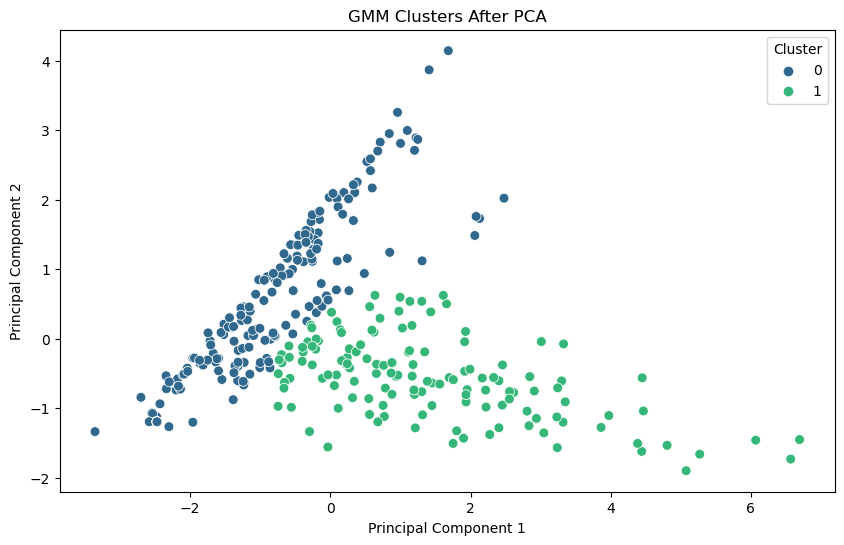

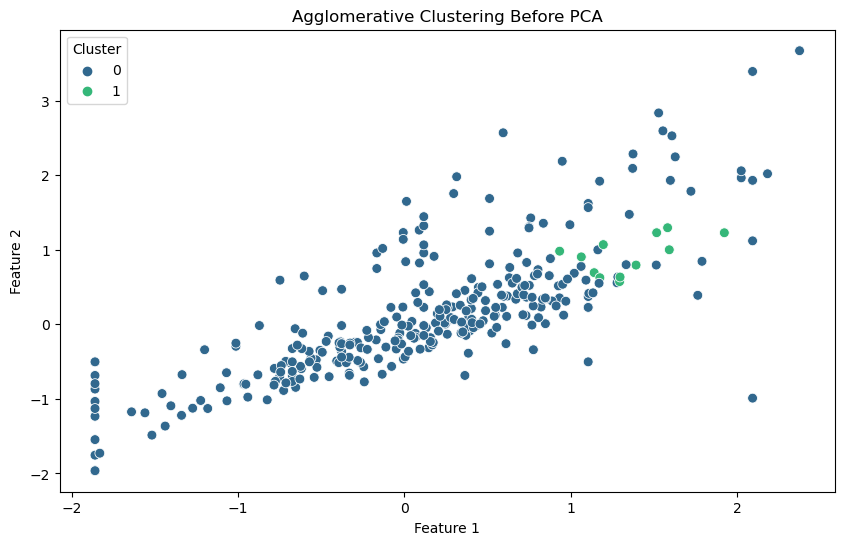

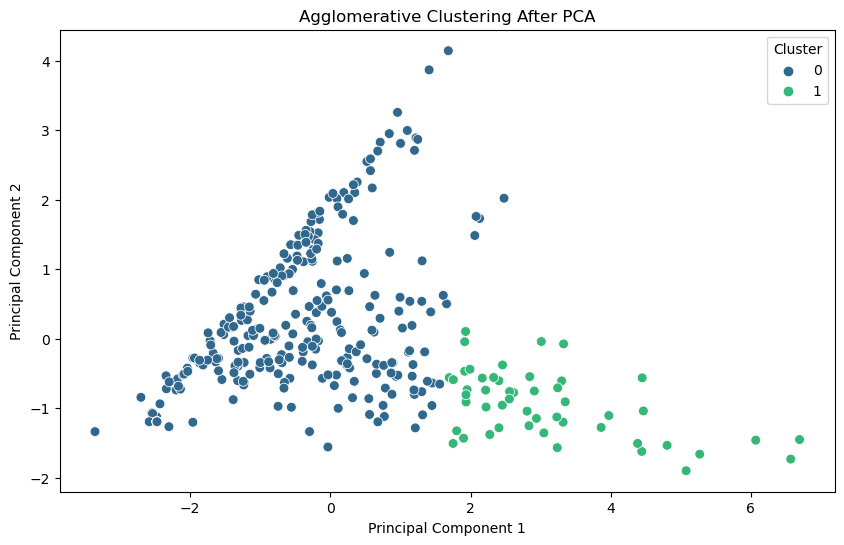

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=team_stats['kmeans_cluster'], palette='viridis', s=50)
plt.title('K-Means Clusters Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_reduced[:, 0], y=X_pca_reduced[:, 1], hue=team_stats['kmeans_pca_cluster'], palette='viridis', s=50)
plt.title('K-Means Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=team_stats['gmm_cluster'], palette='viridis', s=50)
plt.title('GMM Clusters Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_reduced[:, 0], y=X_pca_reduced[:, 1], hue=team_stats['gmm_pca_cluster'], palette='viridis', s=50)
plt.title('GMM Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=team_stats['agg_cluster'], palette='viridis', s=50)
plt.title('Agglomerative Clustering Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_reduced[:, 0], y=X_pca_reduced[:, 1], hue=team_stats['agg_pca_cluster'], palette='viridis', s=50)
plt.title('Agglomerative Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


K-Means Clustering
Before PCA
The clusters are somewhat overlapping, with many data points appearing close together.
After PCA
After PCA, the clusters are more distinct and spread out along the principal components indicating that PCA helped in enhancing the cluster separability.

GMM Clustering
Before PCA
Multiple clusters are identified (0 to 4), with some clusters being more compact while others are more spread outand this is Overlap between clusters.
After PCA
After PCA, the clustering results in only two clusters, which are better separated compared to the before PCA clusters.
The reduction in the number of clusters suggest that PCA helps in simplifying the clustering structure.

Agglomerative Clustering
Before PCA
Similar to K-Means, the clusters are not well separated, with significant overlap between Cluster 0 and Cluster 1.
After PCA
PCA has led to a more distinct separation between the two clusters indicating an improvement in clustering performance.

In the end:
Variance Explanation:
The PCA analysis showed that the first few principal components captured the majority of the variance in the data. This allowed for a more effective clustering in the reduced-dimensional space.

Feature Influence:
The loadings on the principal components indicated that features such as total_win_rate, total_avg_goals, goal_difference, total_matches, and total_goals had the most significant influence on the principal components. These features drove the variance in the data, thus impacting the clustering results.

section F:

In [97]:
player_data = goalscorer.groupby('scorer').agg(
    total_goals=('minute', 'count'),              
    match_count=('date', 'nunique'),                
    total_penalties=('penalty', 'sum'),                  
    total_own_goals=('own_goal', 'sum'),              
    average_goal_minute=('minute', 'mean')                   
).reset_index()

player_data['average_goals_per_match'] = player_data['total_goals'] / player_data['match_count']

player_data.head(10)

scorer  total_goals  match_count  total_penalties  \
0     A'ala Hubail           13            8                1   
1     A. Elangovan            1            1                0   
2  Aage Rou Jensen            1            1                0   
3      Aaran Lines            3            3                0   
4  Aaron Boupendza            1            1                0   
5     Aaron Hughes            1            1                0   
6       Aaron Long            2            1                0   
7       Aaron Mooy            4            4                0   
8      Aaron Njovu            2            2                0   
9     Aaron Ramsey           19           17                6   

   total_own_goals  average_goal_minute  average_goals_per_match  
0                0            55.153846                 1.625000  
1                0            42.000000                 1.000000  
2                0            85.000000                 1.000000  
3                0            56.666667                 1.000000  
4                0            16.000000                 1.000000  
5                0             5.000000                 1.000000  
6                0            65.500000                 2.000000  
7                0            54.250000                 1.000000  
8                0            54.000000                 1.000000  
9                0            46.263158                 1.117647

the quistion: Can we predict whether a player will score an own goal based on their total goals, match count, total penalties, and average goal minute?

For this question, we can use the AdaBoost Classifier algorithm that we learned in the tutorials:

In [100]:
player_data['scored_own_goal'] = player_data['total_own_goals'] > 0

X = player_data[['total_goals', 'match_count', 'total_penalties', 'average_goal_minute']]
y = player_data['scored_own_goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9492119089316988
Confusion Matrix:
[[2710    0]
 [ 145    0]]


The accuracy of 0.9492 suggests that the model is highly accurate in predicting whether a player will score an own goal. This means that the model correctly identified the majority of the instances in the test set
The choice of AdaBoost was appropriate given the ability to focus on difficult to classify instances helped improve the model's accuracy.

While the accuracy is high, the confusion matrix reveals that the model failed to predict any own goal instances correctly. This suggests that the model might not be capturing the features that distinguish players who score own goals from those who don't.

exploring other features or using different machine learning algorithms like Random Forest or Gradient Boosting could provide better results.